## Lab on real-world graph analysis

²

The objective of this lab is to get a feeling of real-world graphs.

## Import

In [1]:
import platform
platform.python_version()

'3.8.3'

In [2]:
import numpy as np

In [3]:
import networkx as nx

In [4]:
import matplotlib.pyplot as plt
from itertools import groupby

In [5]:
import sknetwork as skn

In [6]:
# Util function to plot the inverse cumulative distribution
def ccdf(values):
    x = []
    y = []
    values = sorted(values)

    # First make dist
    dist = [(key, len(list(group))) for key, group in groupby(values)]

    # Then compute inverse cumulative
    total = 1.0
    for (val, count) in dist:
        x.append(val)
        y.append(total)
        total -= count/len(values)
    return x, y

# Util function to return the distribution of values
def dist(values):
    values = sorted(values)

    # First make dist
    dist = [(key, len(list(group))) for key, group in groupby(values)]
    
    return [x[0] for x in dist], [x[1] for x in dist]

## Load data

We will work on 2 graphs induced by the [Vital articles of Wikipedia](https://en.wikipedia.org/wiki/Wikipedia:Vital_articles/Level/4), a selection of about 10,000 articles of the English Wikipedia:
* the directed graph of hyperlinks between these articles,
* the bipartite graph between articles and (stemmed) words used in their summary.

In [7]:
data = skn.data.load_netset('wikivitals')
data.keys()

Parsing files...
Done.


dict_keys(['names_labels_hierarchy', 'names_row', 'names_labels', 'labels', 'adjacency', 'meta', 'labels_hierarchy', 'names', 'names_col', 'biadjacency'])

In [8]:
# graph of links
adjacency = data.adjacency

In [9]:
# graph of words
biadjacency = data.biadjacency

In [10]:
# article names
names = data.names

In [11]:
# article categories
categories = data.names_labels
categories

array(['People', 'History', 'Geography', 'Arts',
       'Philosophy and religion', 'Everyday life',
       'Society and social sciences', 'Biology and health sciences',
       'Physical sciences', 'Technology', 'Mathematics'], dtype='<U27')

In [12]:
# words
words = data.names_col
words

array(['moos', 'tonnag', 'separatist', ..., 'luteum', 'radiat', 'helena'],
      dtype='<U22')

In [13]:
node_index = {name:i for i, name in enumerate(names)}

In [14]:
n_articles, n_words = biadjacency.shape

In [15]:
labels = data.labels


### Basic statistics

* Compute the number of nodes and edges for each of the two Wikivitals graph

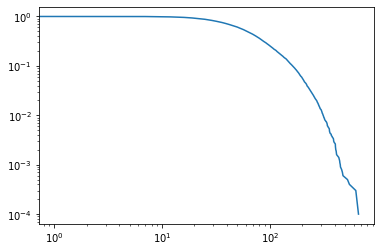

In [16]:
degrees = [ len(adjacency.indices[ adjacency.indptr[x]: adjacency.indptr[x+1]]) for x in range(adjacency.shape[0])] 

x,y = ccdf(degrees)
plt.loglog(x, y)

### Degrees

* What are the minimum degree? The maximum one?
* Compute (and plot) the degree distribution of the WikiVitals graph, in log-log scale. For the `biadjacency`, you can plot separately the distributions for words and articles, and both together
* Based on these informations, how would you filter the graph before training it for a machine learning task? For example, you could imagine removing certain nodes.

### Global density

* Compute the density of the Wikivitals graphs, before and after your filtering *(careful, one of the graphs is bipartite)*

## Traversal

* Code a Breadth-First Search traversal
* Adapt your code to a Depth-First Search traversal
* Apply it to the two graphs

In [17]:
def bfs(graph, source=None):
    """
        Given a graph, returns a list of nodes corresponding to a
        Breadth-First search traversal. If source is None, pick a node randomly.
    """
    pass

## PageRank

The [PageRank](https://en.wikipedia.org/wiki/PageRank) algorithm can be used to recommend nodes (here articles) close to some target.

## To do 

Using the 2 graphs (links, words):
* List the 10 articles the closest to some target of your choice (e.g., Vincent van Gogh).
* For the word graphs, list the 10 closest words of this target.
* Do the same with multiple targets.

In [18]:
pr = skn.ranking.PageRank()

In [19]:
target = node_index['Vincent van Gogh']

In [20]:
pr.fit(adjacency, seeds={target:1})

PageRank(damping_factor=0.85, solver='piteration', n_iter=10, tol=1e-06)

## Community detection

## To do

For the 2 graphs:
* Cluster the graph.
* Display the 5 most important nodes of each cluster (in terms of PageRank).
* Evaluate the quality of the clustering using the categories as ground-truth.

In [21]:
from sklearn.metrics import adjusted_rand_score as ari

In [22]:
louvain = skn.clustering.Louvain()

In [23]:
louvain.fit(adjacency)

Louvain(resolution=1, modularity='dugue', tol_aggregation=0.001, n_aggregations=-1, shuffle_nodes=False, sort_clusters=True, return_membership=True, return_aggregate=True)

In [24]:
ari(labels, louvain.labels_)

0.3018954851357631

## Optional MovieLens: Load data

We will focus on the MovieLens dataset, a dataset of users rating movies. You can download its [graph version](). Regarding [networkx](), it is one of the most common graph libraries in Python. You can check the [documentation](), or ask me. 

In [25]:
import networkx as nx
def load_data(filepath):
    
    edges = []
    
    for line in open(filepath):
        contents = line.split("::")
        user = "U-" + contents[0]
        movie = "M-" + contents[1]
        rating = contents[2]
        edges.append((user, movie))
    return nx.Graph(edges)

# Convention here: all "user" nodes start with "U-", all movie nodes start with "M-"
graph = load_data("ml-1m/ratings.dat")

FileNotFoundError: [Errno 2] No such file or directory: 'ml-1m/ratings.dat'

In [ ]:
# Convention here: all "user" nodes start with "U-", all movie nodes start with "M-"
graph = load_data("ml-1m/ratings.dat")

## To do

* What it the average rating? The ratings distribution?
* Does a rating prediction task make sense in this setting? Can you imagine a learning task that would be relevant on this data?
* What are the most important users? Movies?
* Try using the graph structure to predict adequate movies given a user's past ratings; you can try implementing first a very simple baseline (for example, predict the average rating for everyone), so that you have a point of comparison. You can then get more creative, and use, for examplem degrees, PageRank scores, clustering, as potential features for the rating prediction task.